# Module 5 - Projectile Motion

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2e/Uss_iowa_bb-61_pr.jpg" width=600px>

## Goals

- Solve second order differential equations using coupled first order equations
- Predict projectile motion behavior with realistic effects such as drag


## Tank wars!!

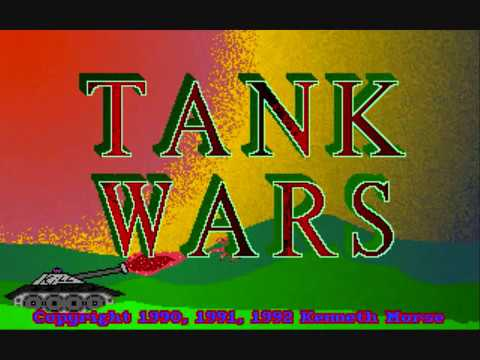

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('KkEDHWEkEEk', width=600, height=400, start=93)

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Second Order Equations

Until now we have solved Newton's 2nd law for the velocity, i.e. we only  had to consider the 1st order ordinary differential equation:

\begin{equation}
\frac{dv}{dt} = \frac{F}{m}.
\end{equation}

However, what if we want the position $x(t)$ as a funciton of time? Newton's law is second order: 
\begin{equation}
\frac{d^2 x}{dt^2} = \frac{F}{m}.
\end{equation}

It turns out that we can still directly apply Euler's method at the cost of having two **coupled** ordinary differential equations

\begin{align}
\frac{d^2 x}{dt^2} &= \frac{dv}{dt} = \frac{F}{m} \\
\frac{d x}{dt} &= v
\end{align}

We can then apply the forward approximation of the derivative two both equations:
\begin{align}
x_{n+1} &= x_{n} + v_{n}\Delta t \\
v_{n+1} &= v_{n} + \frac{F}{m} \Delta t,
\end{align}
which can be simultaneously iterated from a known initial condition $(x_0,v_0)$ at time $t=0$. 

## Trajectory of a Cannon Shell

The above equations are defined for one dimension, but they can be readilly extended to $d$ dimensions where we have $2d$ iterative equations.  Consider a cannon which shoots a projectile of mass $m$ at an initial angle $\theta_0$ with velocity $v_0$.

The vector form of Newton's second law is

\begin{align}
m \frac{d \vec{v}}{d t} &= \vec{F}_{\rm g} + \vec{F}_{\rm g} \\
&= -m g \hat{y} - B_2 v^2 \hat{v},
\end{align}

where $\vec{F}_{\rm g}$ is the force due to gravity, $\vec{F}_{\rm g}$ is the inertial drag force due to wind resistance, and the velocity, $\vec{v}$, is expressed in terms of its magnitude, $v$, and unit vector, $\hat{v}$.

In order to decompose this ODE into scalar equations in the $x$ and $y$ directions, we note that the velocity's magnitude and unit vector can be written as

\begin{equation}
v = \sqrt{v_x^2 + v_y^2}
\end{equation}

and 

\begin{equation}
\hat{v} = \frac{v_x}{v} \hat{x} + \frac{v_y}{v} \hat{y}.
\end{equation}

Altogether we have two differential equations for the velocity components

\begin{align}
\frac{dv_x}{dt} &= - \frac{B_2}{m} v_x \sqrt{v_x^2 + v_y^2} \\
\frac{dv_y}{dt} &= -g - \frac{B_2}{m} v_y \sqrt{v_x^2 + v_y^2},
\end{align}

and two differential equations for the position components

\begin{align}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y .\\
\end{align}

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Write the four coupled equations above in discrete form using Euler's method. Use these equations to solve for the trajectory of a cannon ball of mass $m=1~\rm{kg}$ assuming an initial velocity of $v_0 = 500~\rm{m/s}$ at an angle of 45 degrees, and starting position at the origin, $(x_0,y_0)=(0,0)$. Compare the solutions for the ideal case, $B_2=0$, vs including air drag, $B_2=4\times10^{-5}$. Create a plot of $y(t)$ vs $x(t)$ for each case. A time step of $\Delta t = 0.1$ seconds should work well for this problem.
</div>

<IPython.core.display.Javascript object>


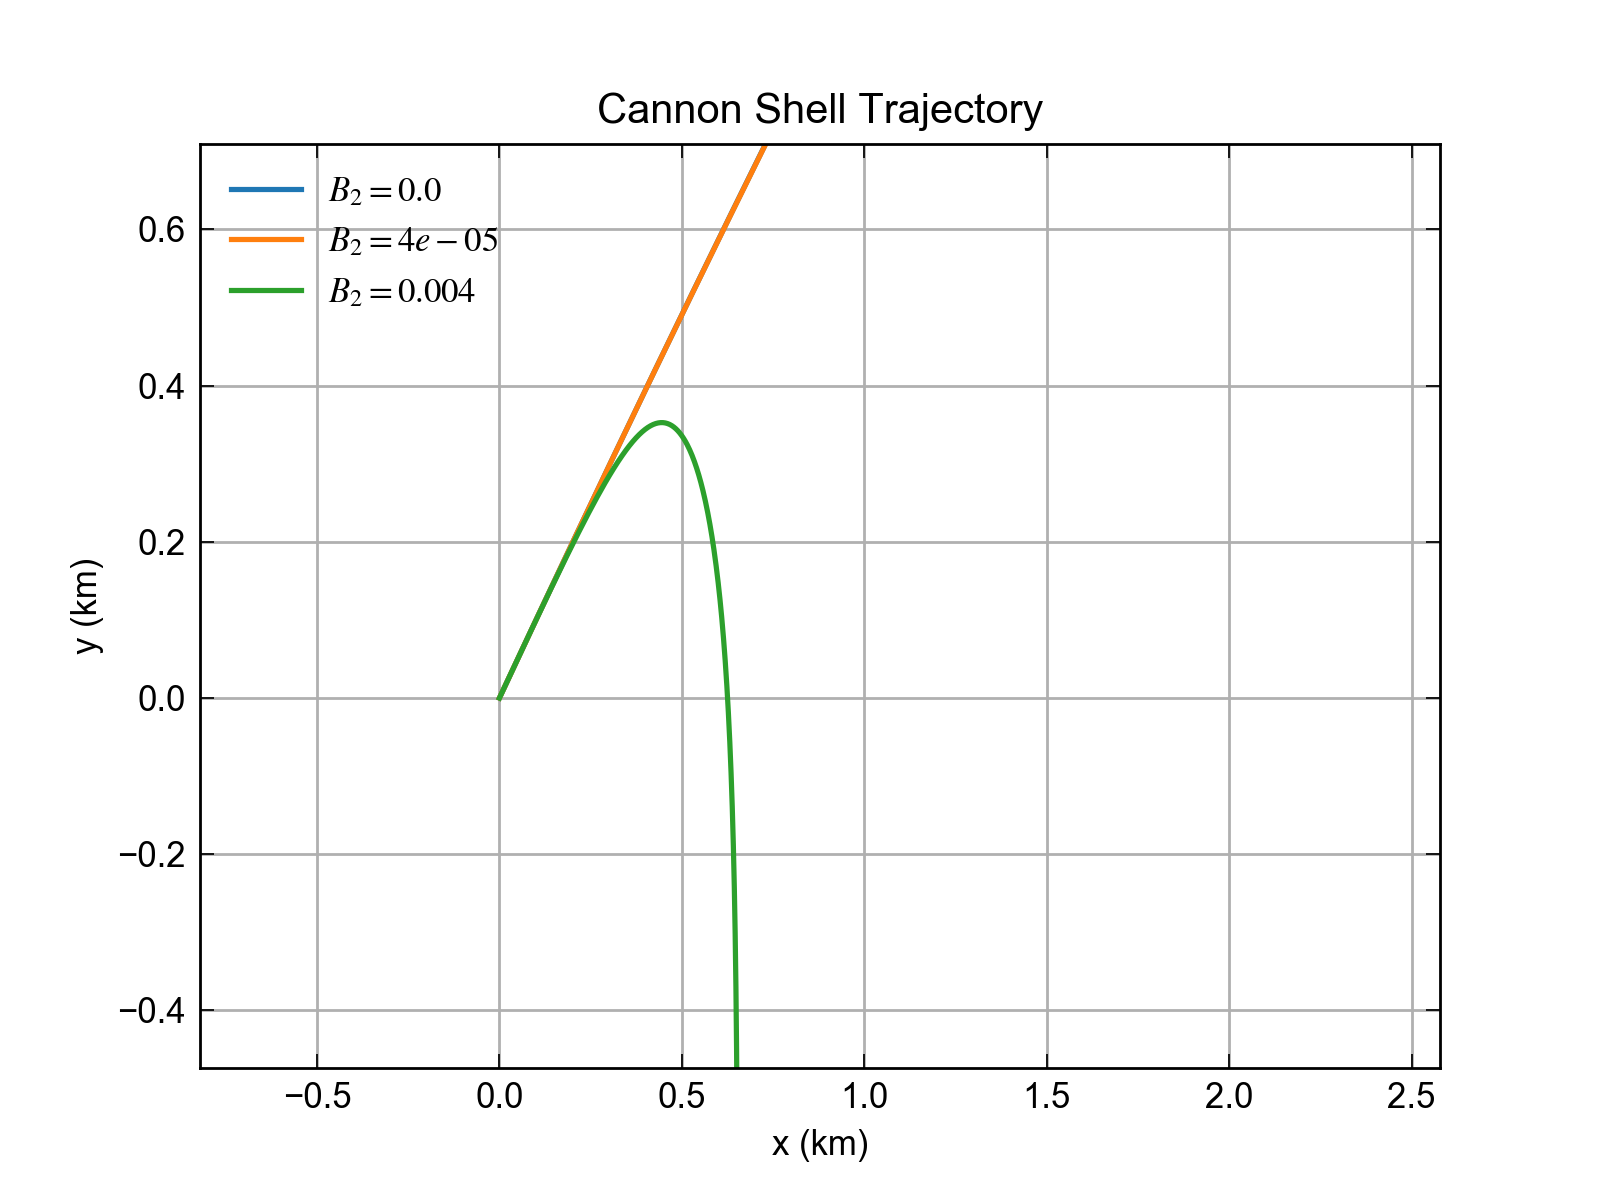

In [2]:
from scipy.constants import g

dt = 0.1 # s
v0 = 500.0  # m/s
theta = np.radians(45) # radians
m = 1.0 # kg
tmax = 70 # s

t = np.arange(0,tmax,dt)

x = np.zeros_like(t)
y = np.zeros_like(t)
vx = np.zeros_like(t)
vy = np.zeros_like(t)

vx[0] = v0*np.cos(theta)
vy[0] = v0*np.sin(theta)

plt.figure()

for B2 in (0.0, 4.0E-5, 4.0E-3):
    for n in range(len(t)-1):
        v = np.sqrt(vx[n]**2 + vy[n]**2)
        vx[n+1] = vx[n] - B2*v*vx[n]*dt/m
        vy[n+1] = vy[n] - g*dt - B2*v*vy[n]*dt/m
        x[n+1] = x[n] + vx[n]*dt
        y[n+1] = y[n] + vy[n]*dt
    
    plt.plot(x/1000, y/1000, label=r'$B_2={0}$'.format(B2))

plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.legend()
plt.grid(True)
plt.title('Cannon Shell Trajectory')

Our results clearly show that the range of motion of the projectile is reduced by drag. 

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Modify your code to create a set of trajectories for different initial angles from 15 to 75 degrees with and without air drag. Use a while loop, `while condition == True:`, to adaptively iterate the equations until the projectile has hit the ground, $y_n \leq 0$. Use the matplotlib subplot function, `plt.subplot(nrows, ncols, index)`, to create two separate plots within the same figure for the two drag cases.
</div>

<IPython.core.display.Javascript object>


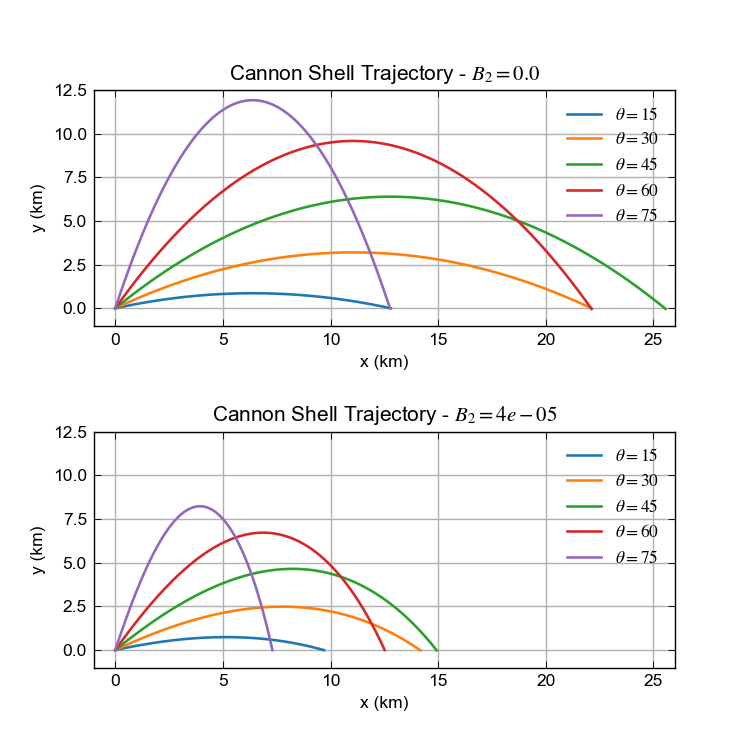

In [3]:
dt = 0.1 # s
v0 = 500.0  # m/s
m = 1.0 # kg

plt.figure(figsize=(6,6))

for i,B2 in enumerate([0.0, 4E-5]):
    ax = plt.subplot(2, 1, i+1) # create a new axis for each subplot
    for theta in (15,30,45,60,75):
        theta = np.radians(theta)
        x = np.array([0.0])
        y = np.array([0.0])
        vx = np.array([v0*np.cos(theta)])
        vy = np.array([v0*np.sin(theta)])
        
        n = 0
        while y[-1] >= 0.0:
            v = np.sqrt(vx[n]**2 + vy[n]**2)
            vx = np.append(vx, vx[n] - B2*v*vx[n]*dt/m)
            vy = np.append(vy, vy[n] - g*dt - B2*v*vy[n]*dt/m)
            x = np.append(x, x[n] + vx[n]*dt)
            y = np.append(y, y[n] + vy[n]*dt)
            n+=1
    
        ax.plot(x/1000, y/1000, label=r'$\theta={0:2.0f}$'.format(np.degrees(theta)))

    # set the properties for each plot
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_xlim(-1,26)
    ax.set_ylim(-1,12.5)
    ax.legend()
    ax.grid(True)
    ax.set_title(r'Cannon Shell Trajectory - $B_2={0}$'.format(B2))

plt.subplots_adjust(hspace = 0.45) # adjust the height space between subplots

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Find the intial angle $\theta$ that leads to a sucessful hit of a target $13.5 \pm 0.1~\rm{km}$ away if the initial projectile velocity is $v_0 = 500~\rm{m/s}$. Hint: rather than using a `for` loop as in the previous challenge to find the trajectories at certain angles, use a `while` loop to start at an angle of $5$ degrees and sweep an increasing range of angles until the solution to the last point (where the projectile has hit the ground) in the current trajectory is within the desired range, $13.4 - 13.5~\rm{km}$. How much does the value of $\theta$ differ when there is no air resistance?
</div>

<IPython.core.display.Javascript object>


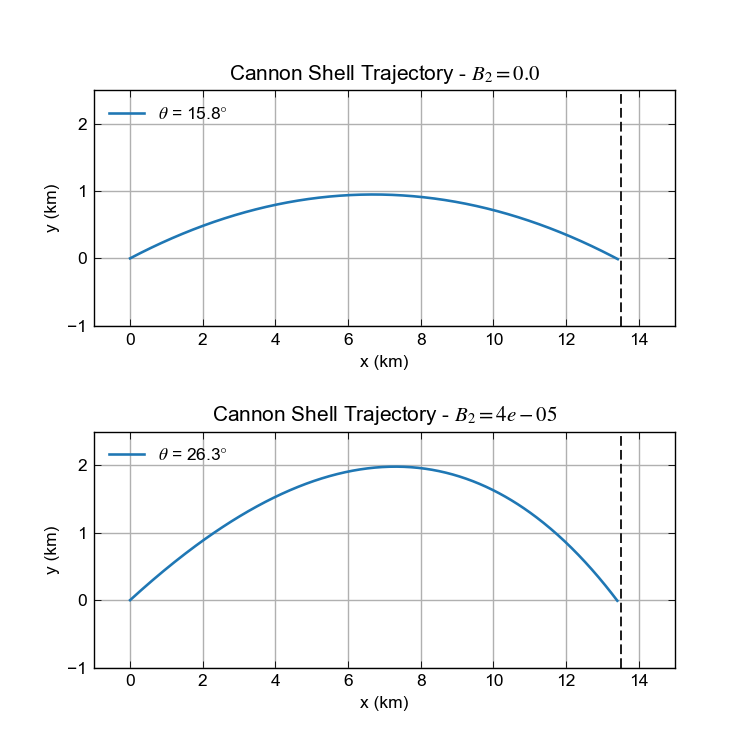

In [5]:
dt = 0.1 # s
v0 = 500.0  # m/s
m = 1.0 # kg
dtheta = 0.001
xmin = 13400
xmax = 13600

plt.figure(figsize=(6,6))

for i,B2 in enumerate([0.0, 4.0E-5]):
    ax = plt.subplot(2, 1, i+1) # create a new axis for each subplot
    theta = np.radians(5)
    x = np.array([0.0])
    while not (xmin < x[-1] < xmax):
        x = np.array([0.0])
        y = np.array([0.0])
        vx = np.array([v0*np.cos(theta)])
        vy = np.array([v0*np.sin(theta)])
        
        n = 0
        while y[-1] >= 0.0:
            v = np.sqrt(vx[n]**2 + vy[n]**2)
            vx = np.append(vx, vx[n] - B2*v*vx[n]*dt/m)
            vy = np.append(vy, vy[n] - g*dt - B2*v*vy[n]*dt/m)
            x = np.append(x, x[n] + vx[n]*dt)
            y = np.append(y, y[n] + vy[n]*dt)
            n+=1
        theta += dtheta
        
        if x[-1] > xmax:
            print('Too Far!')
            break
    
    ax.plot(x/1000, y/1000, label=r'$\theta$ = {0:2.1f}$\degree$'.format(np.degrees(theta)))

    # set the properties for each plot
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_xlim(-1,15)
    ax.set_ylim(-1,2.5)
    ax.legend()
    ax.grid(True)
    ax.set_title(r'Cannon Shell Trajectory - $B_2={0}$'.format(B2))
    ax.axvline(x=13.5, color='k', linewidth=1.0, linestyle='--')

plt.subplots_adjust(hspace = 0.45) # adjust the height space between subplots


## What about variable air resistance?
Air density, and therefore the drag force, depend on multiple factors such as altitude and temperature. A simple model for the dependence of air density on altitude is based on the ideal gas isothermal approximation. In this approximation, the atmospheric pressure at a height $y$ (based on a reference point such as sea level) is given by the relation

\begin{equation}
    p(y) = p(0)e^{-mgy/k_B T}
\end{equation}

where $m$ is the average mass of an air molecule, $k_B$ is Boltzmann's constant, and $T$ is the absolute temperature. For an ideal gas the pressure is proportional to the density, and therefore we can write the density as

\begin{equation}
    \rho(y) = \rho_0e^{-y/y_0}
\end{equation}

where $\rho_0$ is the density at sea level ($y=0$) and $y_0=k_B T/mg \approx 1.0 \times 10^4$ m.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Use the relation for the air density, $\rho(y)$, to modify the inertial drag factor so it becomes $B_2\rho_0e^{-y(t)/y_0}$. Create three plots that compare the trajectories at different angles for no air friction, air friction with constant air density, and friction with variable air density. Use the same parameters as before and assume that $\rho_0=1$ and $y_0=1.0\times10^4$.
</div>

<IPython.core.display.Javascript object>


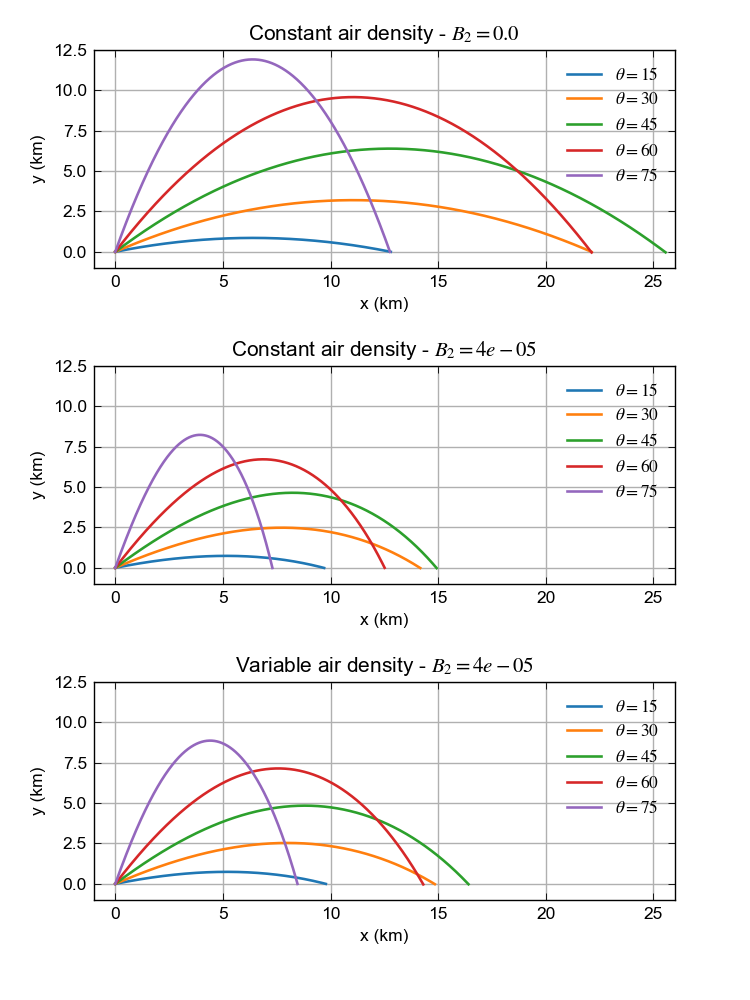

In [4]:
dt = 0.1 # s
v0 = 500.0  # m/s
m = 1.0 # kg
y0 = 1E4
rho0=1.0

plt.figure(figsize=(6,8))

for i,B2 in enumerate([0.0, 4E-5]):
    ax = plt.subplot(3, 1, i+1) # create a new axis for each subplot
    for theta in (15,30,45,60,75):
        theta = np.radians(theta)
        x = np.array([0.0])
        y = np.array([0.0])
        vx = np.array([v0*np.cos(theta)])
        vy = np.array([v0*np.sin(theta)])
        
        n = 0
        while y[-1] >= 0.0:
            v = np.sqrt(vx[n]**2 + vy[n]**2)
            vx = np.append(vx, vx[n] - B2*v*vx[n]*dt/m)
            vy = np.append(vy, vy[n] - g*dt - B2*v*vy[n]*dt/m)
            x = np.append(x, x[n] + vx[n]*dt)
            y = np.append(y, y[n] + vy[n]*dt)
            n+=1
    
        ax.plot(x/1000, y/1000, label=r'$\theta={0:2.0f}$'.format(np.degrees(theta)))

    # set the properties for each plot
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_xlim(-1,26)
    ax.set_ylim(-1,12.5)
    ax.legend()
    ax.grid(True)
    ax.set_title(r'Constant air density - $B_2={0}$'.format(B2))

ax = plt.subplot(3, 1, 3) # create a new axis for each subplot
for theta in (15,30,45,60,75):
    theta = np.radians(theta)
    x = np.array([0.0])
    y = np.array([0.0])
    vx = np.array([v0*np.cos(theta)])
    vy = np.array([v0*np.sin(theta)])

    n = 0
    while y[-1] >= 0.0:
        v = np.sqrt(vx[n]**2 + vy[n]**2)
        vx = np.append(vx, vx[n] - B2*rho0*np.exp(-y[n]/y0)*v*vx[n]*dt/m)
        vy = np.append(vy, vy[n] - g*dt - B2*rho0*np.exp(-y[n]/y0)*v*vy[n]*dt/m)
        x = np.append(x, x[n] + vx[n]*dt)
        y = np.append(y, y[n] + vy[n]*dt)
        n+=1

    ax.plot(x/1000, y/1000, label=r'$\theta={0:2.0f}$'.format(np.degrees(theta)))

# set the properties for each plot
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_xlim(-1,26)
ax.set_ylim(-1,12.5)
ax.legend()
ax.grid(True)
ax.set_title(r'Variable air density - $B_2={0}$'.format(B2))    

plt.subplots_adjust(hspace = 0.45, top=0.95, bottom=0.1) # adjust the height space between subplots